In [1]:
# load packages for analysis
import os
import ast
import contextily as ctx
import dask.dataframe as dd
import dask_geopandas as dg
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import networkx as nx
import osmnx as ox
import pandas as pd
import pyogrio
import seaborn as sns
from xml import etree
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
import shapely.wkt
import statsmodels.api as sm

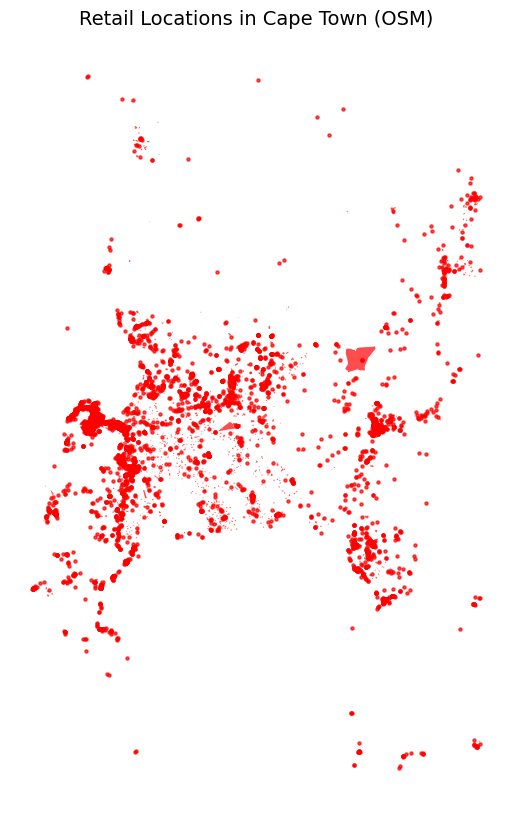

In [12]:
from osmnx.features import features_from_bbox
import matplotlib.pyplot as plt

# Define bounding box (west, south, east, north)
bbox = (18.307, -34.391, 19.019, -33.468)

tags = {
    # Retail & Commerce
    "shop": True,
    "amenity": [
        # Food & Beverage
        "restaurant", "cafe", "fast_food", "bar", "pub",
        # Offices & Services
        "bank", "post_office", "atm", "car_repair", "hairdresser", "beauty", "laundry", "clinic",
        # Education
        "school", "university", "college", "kindergarten",
        # Hospitality
        "hotel", "guest_house", "hostel", "motel",
        # Retail
        "marketplace"
    ],
    # Offices & Services
    "office": True,
    # Education
    "education": True,  # sometimes used in custom tagging, not standard
    # Hospitality
    "tourism": ["hotel", "guest_house", "hostel", "motel"]
}


# Correct function usage: only two arguments — bbox and tags
retail_gdf = features_from_bbox(bbox, tags)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
retail_gdf.plot(ax=ax, color="red", markersize=5, alpha=0.7)
ax.set_title("Retail Locations in Cape Town (OSM)", fontsize=14)
ax.axis('off')
plt.show()


In [ ]:
retail_gdf.to_file("cape_town_economic_activity.gpkg", layer='osm_data', driver="GPKG")

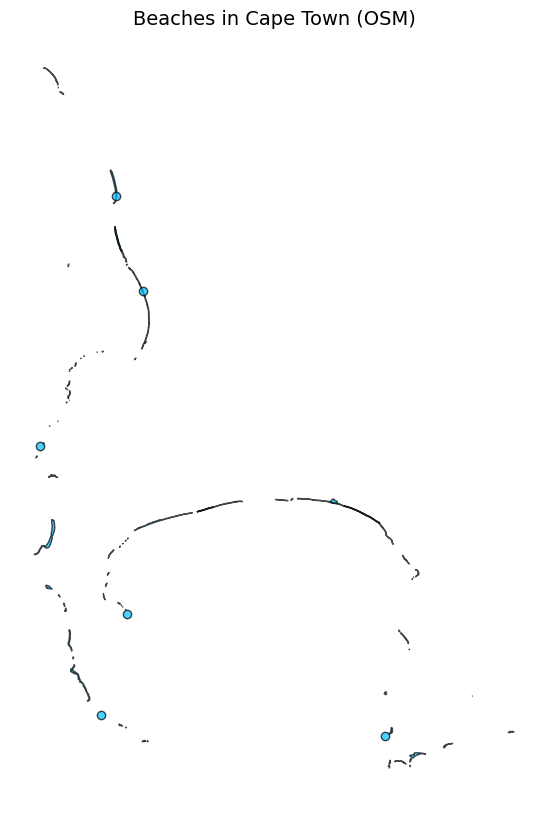

In [1]:
from osmnx.features import features_from_bbox
import matplotlib.pyplot as plt

# Define bounding box for Cape Town (west, south, east, north)
bbox = (18.307, -34.391, 19.019, -33.468)

# Define beach-related tags
beach_tags = {
    "natural": "beach",
    "leisure": "beach_resort",
    "tourism": "beach_resort"
}

# Extract features from OSM
beach_gdf = features_from_bbox(bbox, beach_tags)

# Plot beaches
fig, ax = plt.subplots(figsize=(10, 10))
beach_gdf.plot(ax=ax, color="deepskyblue", alpha=0.7, edgecolor='k')
ax.set_title("Beaches in Cape Town (OSM)", fontsize=14)
ax.axis('off')
plt.show()

In [2]:
beach_gdf.to_file("cpt_beaches.gpkg", layer='osm_data', driver="GPKG")

In [3]:
tower_gdf.to_file("cpt_celltowers.gpkg", layer='osm_data', driver="GPKG")

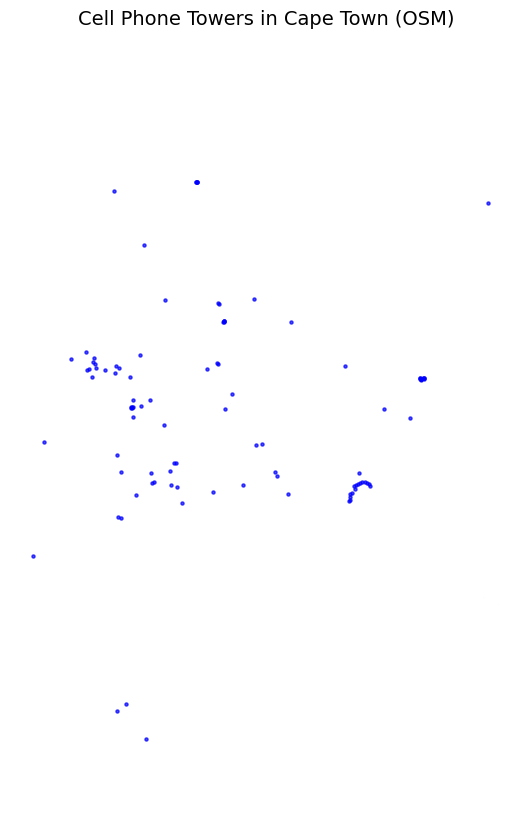

In [2]:
from osmnx.features import features_from_bbox
import matplotlib.pyplot as plt

# Define bounding box (west, south, east, north)
bbox = (18.307, -34.391, 19.019, -33.468)

# Tags for cell phone towers (towers or man_made=tower)
tags = {
    "man_made": "tower",
    "tower:type": "cellular"  # Filters for cellular towers (if applicable)
}

# Correct function usage: only two arguments — bbox and tags
tower_gdf = features_from_bbox(bbox, tags)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
tower_gdf.plot(ax=ax, color="blue", markersize=5, alpha=0.7)
ax.set_title("Cell Phone Towers in Cape Town (OSM)", fontsize=14)
ax.axis('off')
plt.show()